### HW3_Part_01_Exploraory Data Analysis (EDA) on two dataset (JMA vs BGCArgo nitrate)

### Outline

1. Plot sampling map of JMA (Japan Meteorological Agency)-nitrate dataset to see the spatial coverage
2. Create 2D-scatter-plot of nitrate against depth and latitude/datetime to see transect profiles
3. Plot the depth profile of nitrate where we can identify that nitrate in the Sea of Japan was "standing out" from the rest
4. Overlay sampling stations from BGCArgo dateset with JMA map to see if the two spatial coverages were in good overlapping
5. Create 2D-scatter-plot of nitrate against depth and latitude/datetime using Argo dataset where we can find Argo float only collect data from <1000 m, but in much higher frequency than the JMA dataset, where the latter were collected using CTD-Rosette sampler. 
6. Plot T-S diagram to compare the water mass compostisions between these two dataset.


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# import data
infile = '../data/jma_nitrate.csv'

data = pd.read_csv(infile, sep=',')

print(data.columns)

Index(['Unnamed: 0', 'theta', 'sal', 'depth', 'nitrate', 'lon', 'lat', 'date',
       'year', 'month', 'day', 'profile', 'cruise', 'vessel', 'density'],
      dtype='object')


In [3]:
data = data[data.nitrate>=0]
subset = data[(data.nitrate>=0) & (data.depth < 10)]

### Map


In [4]:
# import cartopy package for mapping 
import cartopy as cp
import cartopy.crs as ccrs

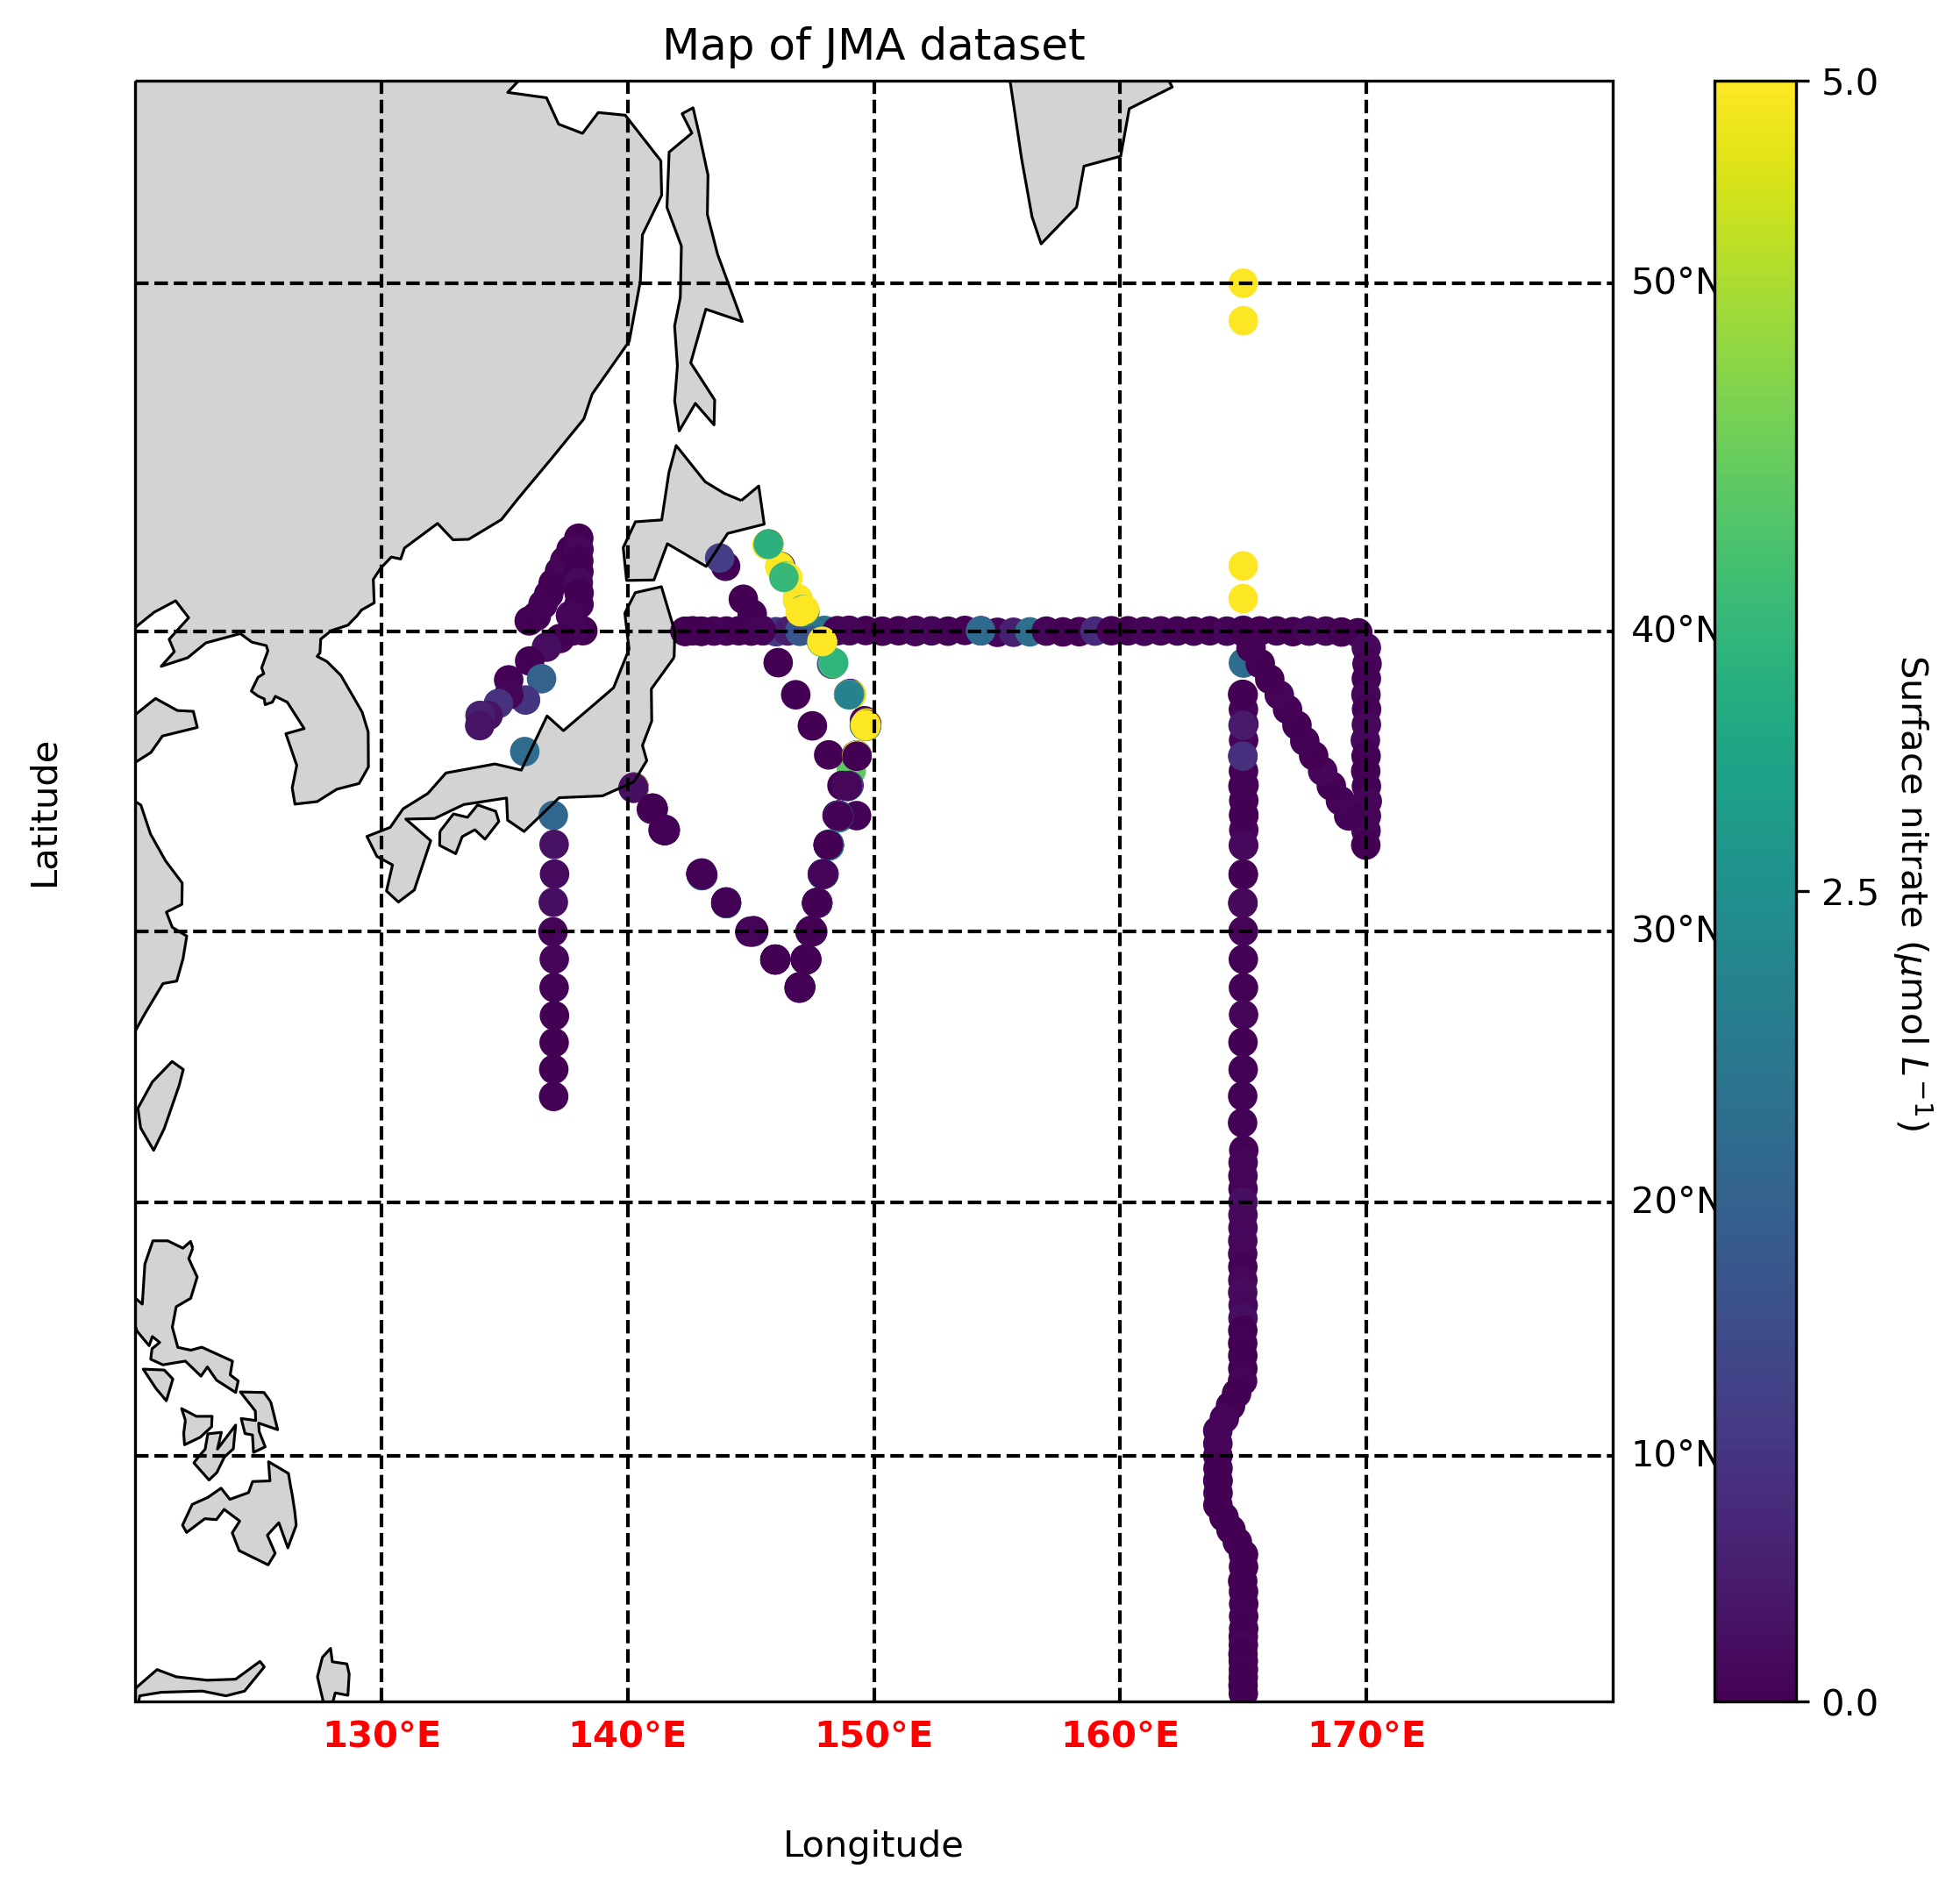

In [5]:
# create a regional map with parallels and meridians

fig = plt.figure(figsize = (10,8), dpi = 300)


ax = fig.add_subplot(1,1,1, projection = ccrs.Mercator
                     (central_longitude = 0.0, min_latitude = 0.0,
                      max_latitude = 55.0))

# ax.set_extent(east, west, south, north)
ax.set_extent([120.0, 180.0, 0.0, 55.0])

ax.coastlines(linewidth=0.75, color='black')

ax.set_title('Map of JMA dataset')#, color = 'red', weight = 'bold')
ax.set_xlabel('Longitude',labelpad=5)

# how to add lines of latitude and longitude
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k',linestyle='--')
gl.top_labels = False
gl.left_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.xlines = True
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])

gl.ylocator = mticker.FixedLocator([0, 10, 20, 30, 40, 50, 55])
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

ax.add_feature(cp.feature.LAND, facecolor = 'lightgrey')
# if you want to add text axes labels
ax.text(-0.05, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)

ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)

nn = ax.scatter(subset.lon, subset.lat,s=50, c= subset.nitrate, vmin=0, vmax=5,transform=ccrs.PlateCarree(), )

cb= fig.colorbar(nn,shrink=1)
cb.set_ticks([0, 2.5, 5])
# colorbar.ax.set_aspect(1)
cb.set_label('Surface nitrate ($\mu$mol $L^{-1}$)', rotation=270, labelpad=15)
plt.show()

* JMA collected data not only from Pacific, but also inside the marginal sea (The Sea of Japan)
* The latitude ranged from equator to 50 degree north


### 2D-scatter-plot



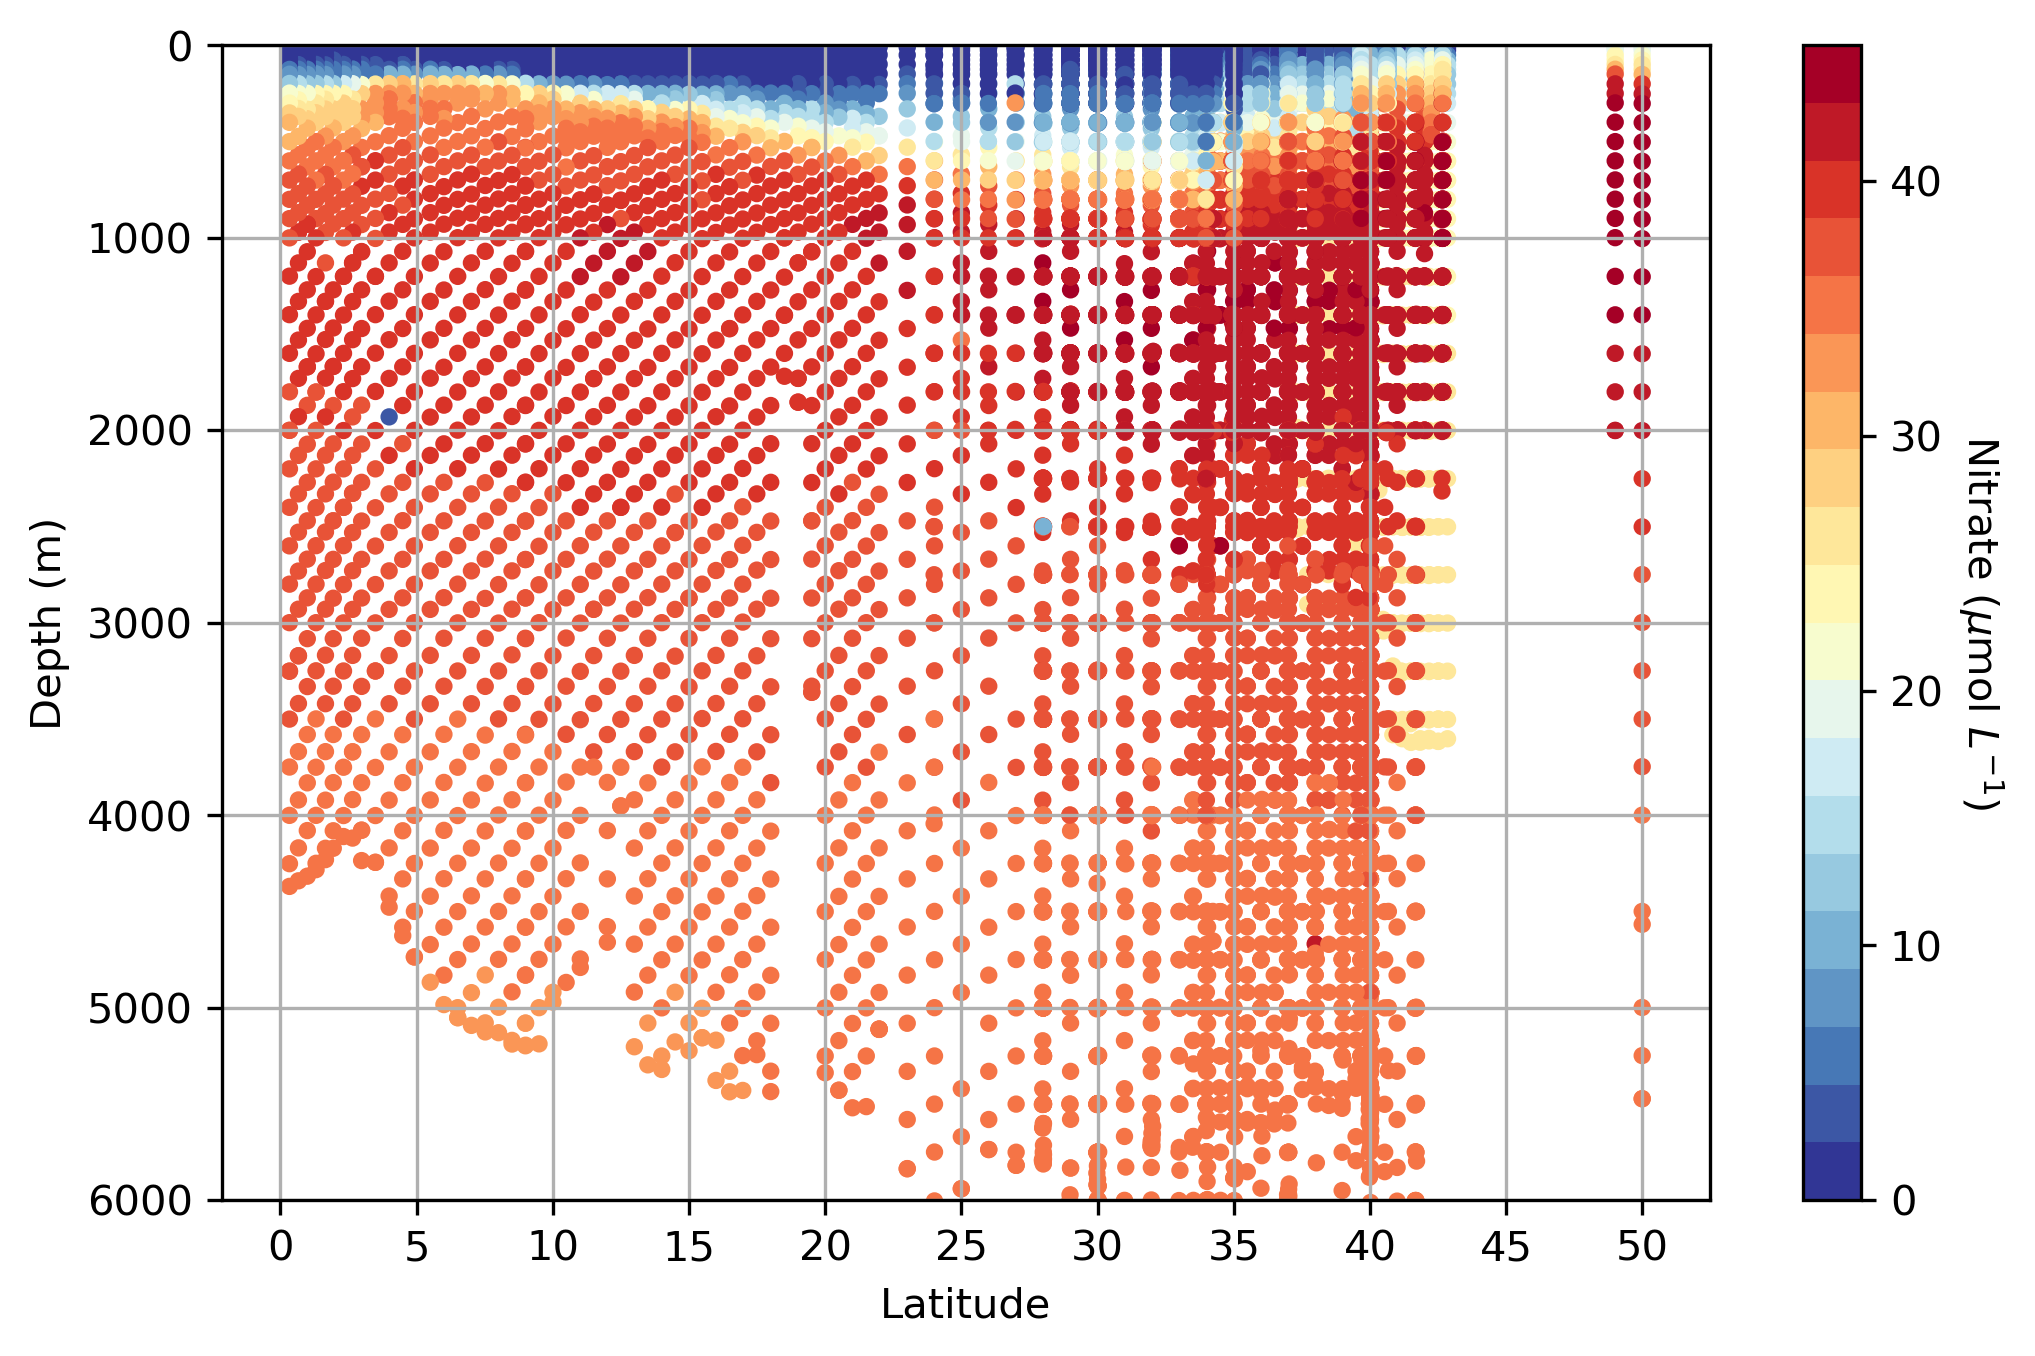

In [6]:
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

palette = plt.get_cmap('RdYlBu_r', 20 )
fig = plt.figure(figsize = (8,5), dpi = 300)
plt.scatter(data.lat, data.depth, s = 10, c = data.nitrate, cmap = palette)
plt.ylim([0, 6000])
plt.gca().invert_yaxis()
plt.grid('True')
cb = plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
plt.xticks([0, 5, 10, 15, 20,25,30,35,40,45,50], ['0', '5', '10', '15', '20','25','30','35','40','45','50'])
cb.set_label('Nitrate ($\mu$mol $L^{-1}$)', rotation=270, labelpad=15)
plt.show()


* Again we can see the latitude ranged from equator to 50 degree north
* It also included the Marginal Sea (Sea of Japan), the yellow dots in the deeper depth between 35 and 43 degree north was suspicious 

* Now check year and seasonal coverage 

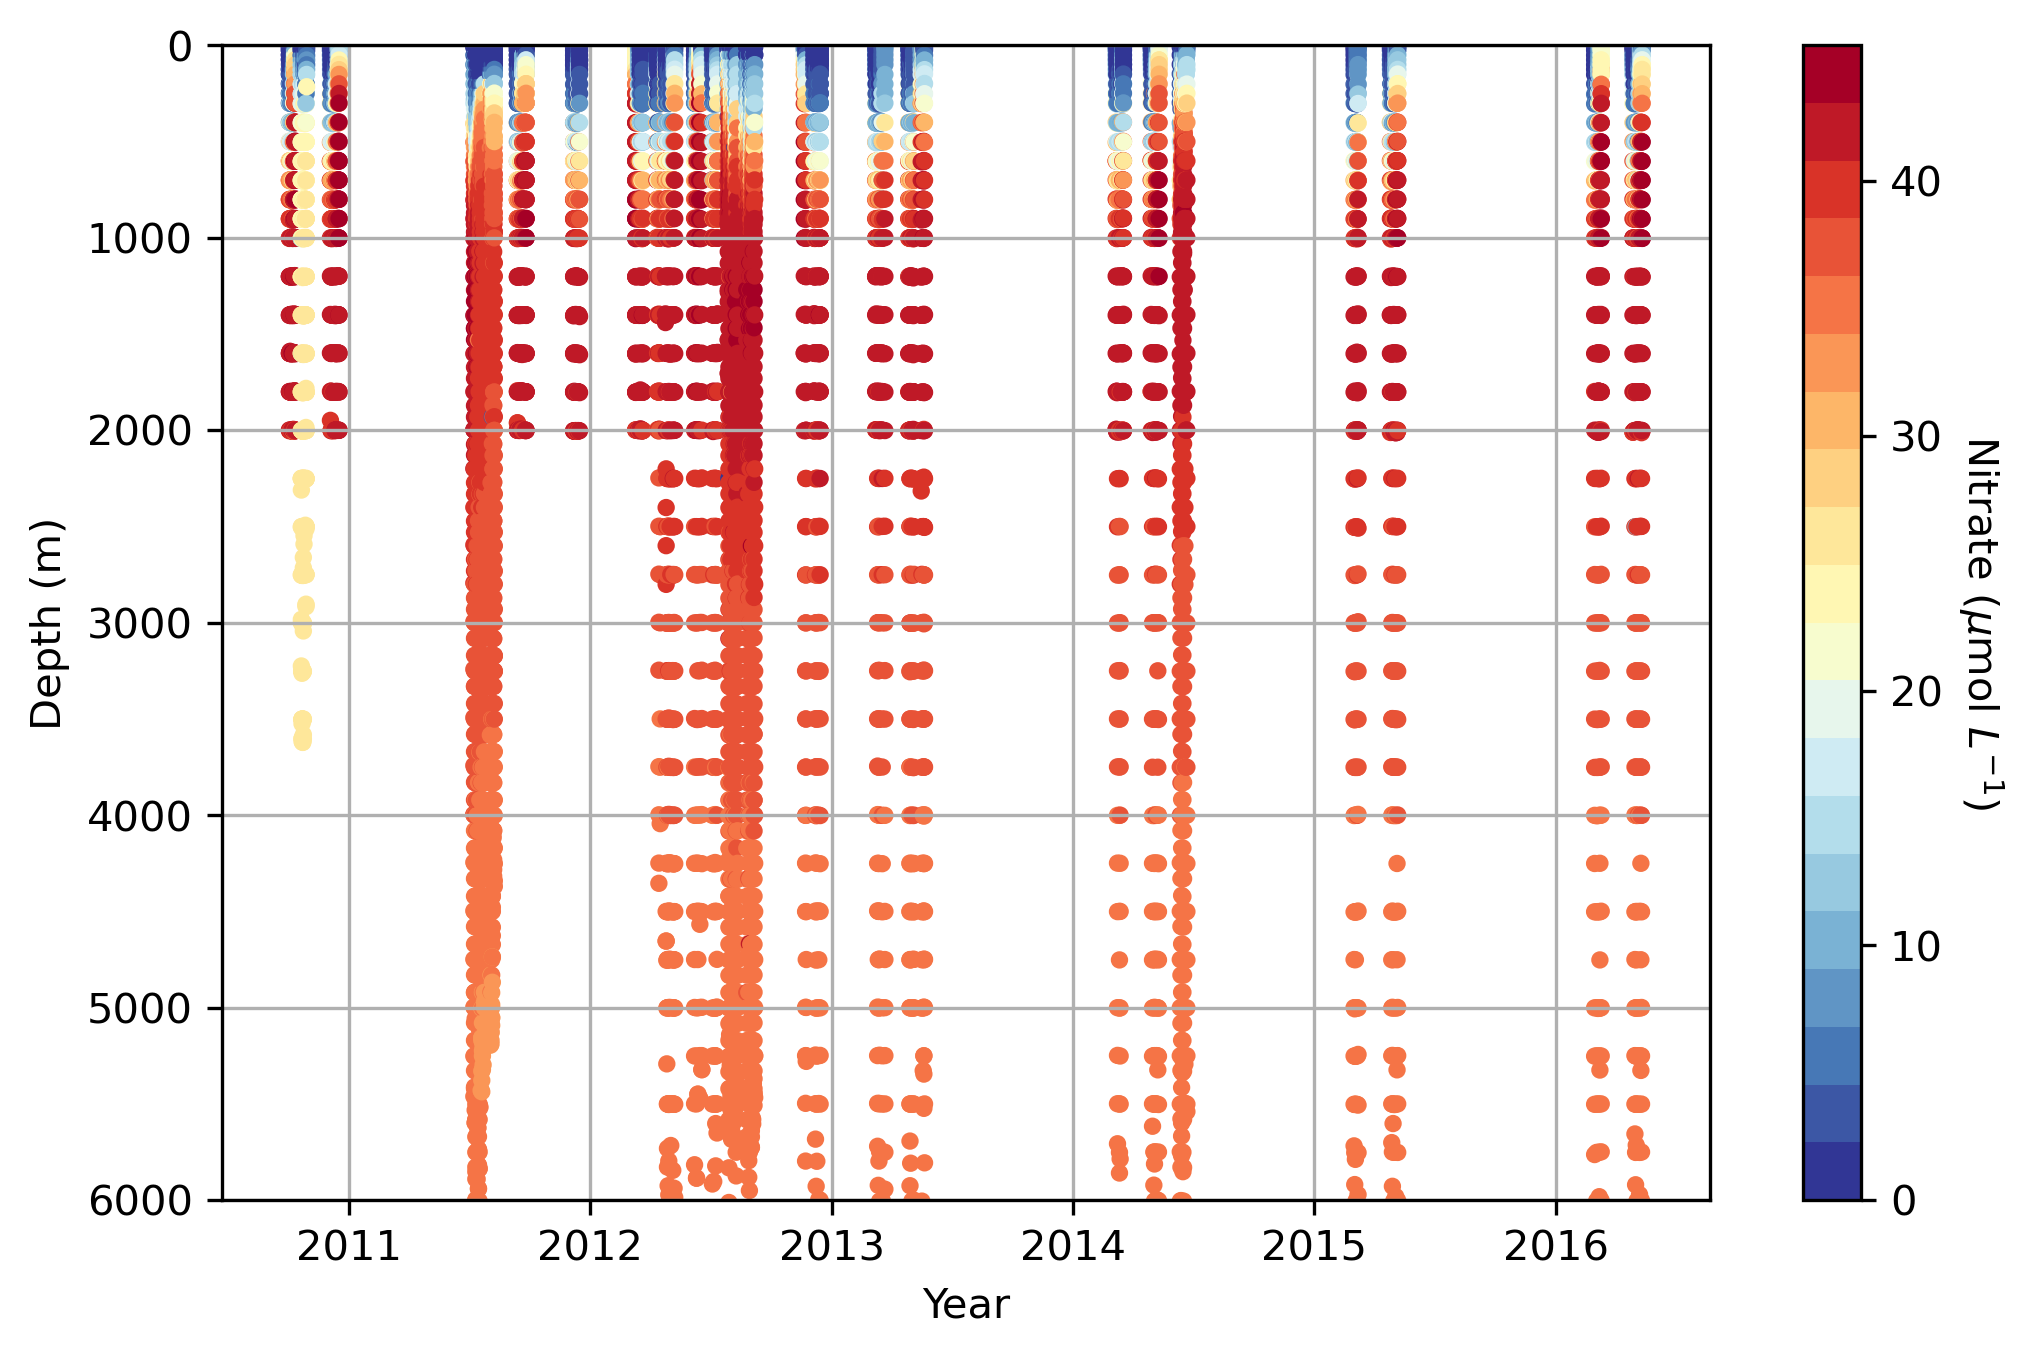

In [7]:
# combine year, month and day columns into a single datetime column
data['date'] = pd.to_datetime(data[['year', 'month','day']])

palette = plt.get_cmap('RdYlBu_r', 20 )
fig = plt.figure(figsize = (8,5), dpi = 300)
plt.scatter(data.date, data.depth, s = 10, c = data.nitrate, cmap = palette)
plt.ylim([0, 6000])
plt.gca().invert_yaxis()
plt.grid('True')
cb = plt.colorbar()
plt.xlabel('Year')
plt.ylabel('Depth (m)')
# plt.xticks([0, 5, 10, 15, 20,25,30,35,40,45,50], ['0', '5', '10', '15', '20','25','30','35','40','45','50'])
cb.set_label('Nitrate ($\mu$mol $L^{-1}$)', rotation=270, labelpad=15)
plt.show()

### Depth profile



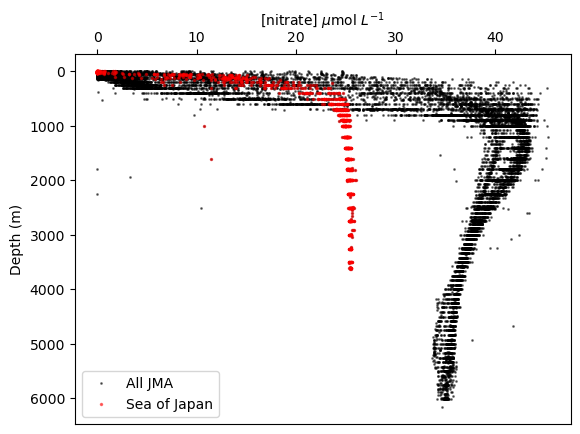

In [8]:
# try to see depth vs nitrate

plt.plot(data.nitrate,data.depth,'o',c='black', alpha=0.5, markersize=1,label = 'All JMA')

## see data from SEA OF JAPAN
subset_SJ = data[((data.lat>=35) & (data.lon < 140))] 

plt.plot(subset_SJ.nitrate,subset_SJ.depth,'o',c='red', alpha=0.5, markersize=1.5,label = 'Sea of Japan')

ax = plt.gca()

ax.invert_yaxis()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel('[nitrate] $\mu$mol $L^{-1}$')
ax.set_ylabel('Depth (m)')

ax.legend(loc = 'lower left')

plt.show()

###  1. Reomove Sea of Japan data are off, the highest value of nitrate only ~ 25 uM
###  2. Remove regions within Latitude< 25 north becasue it has different nitrate signatures between 1000-2000 m
###  3. Romove data > 45 degree becasue probably too far

In [9]:
# slicing off SEA OF JAPAN region
subset_NSJ = data[~ ((data.lat>=35) & (data.lon < 140))]

# slicing off latitude < 25 degree and > 45 region

subset_NSJ = subset_NSJ[((subset_NSJ.lat>=25) & (subset_NSJ.lat<45))]

subset_NSJ.info()

# slicing surface data

subset_NSJ_surf=subset_NSJ[((subset_NSJ.nitrate>=0) & (subset_NSJ.depth < 10))]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13318 entries, 0 to 16220
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  13318 non-null  int64         
 1   theta       13318 non-null  float64       
 2   sal         13318 non-null  float64       
 3   depth       13318 non-null  int64         
 4   nitrate     13318 non-null  float64       
 5   lon         13318 non-null  float64       
 6   lat         13318 non-null  float64       
 7   date        13318 non-null  datetime64[ns]
 8   year        13318 non-null  float64       
 9   month       13318 non-null  float64       
 10  day         13318 non-null  float64       
 11  profile     13318 non-null  float64       
 12  cruise      13318 non-null  object        
 13  vessel      13318 non-null  object        
 14  density     13318 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(2), object(2)
memory usage: 1

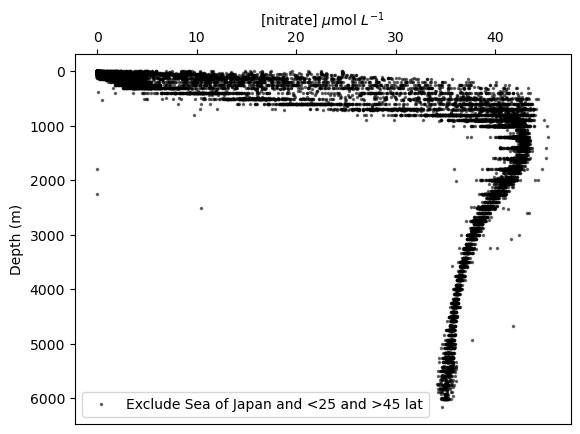

In [10]:
plt.plot(subset_NSJ.nitrate,subset_NSJ.depth,'o',c='black', alpha=0.5, markersize=1.5,label = 'Exclude Sea of Japan and <25 and >45 lat')
ax = plt.gca()

ax.invert_yaxis()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel('[nitrate] $\mu$mol $L^{-1}$')
ax.set_ylabel('Depth (m)')

ax.legend(loc = 'lower left')

plt.show()


* The profile shows that it may be "right" (intuitively) to remove regions within <25 and >45 degree 
* It apparently still has a few outliers, consider to clean them if necessary

### Now try BGCArgo data

In [11]:
# import data
infile_BGCArgo = '../data/kuro_BGCargo_NO3.csv'

data_Argo = pd.read_csv(infile_BGCArgo, sep=',')


print(data_Argo.columns)

# replace column names using more user-friedly names

data_Argo = data_Argo.rename(columns={'Date/GMT': 'date', 'Days since 1/1/1900': 'days', 'NITRATE[uMOL/KG]': 'nitrate', 'DEPTH[M]':'depth',
                                    'PRESSURE[DBAR]':'pres','NA':'NA','SALINITY[PSS]':'sal','TEMPERATURE[C]':'temp','SIGMATHETA[KG/M3]':'sigmatheta',
                                     'OXYGEN[uMOL/KG]':'oxy', 'OXYGENSAT':'oxysat','LON': 'lon', 'LAT':'lat'})
print(data_Argo.columns)

data_Argo.describe()

Index(['Date/GMT', 'Days since 1/1/1900', 'NITRATE[uMOL/KG]', 'DEPTH[M]',
       'PRESSURE[DBAR]', 'NA', 'SALINITY[PSS]', 'TEMPERATURE[C]',
       'SIGMATHETA[KG/M3]', 'OXYGEN[uMOL/KG]', 'OXYGENSAT', 'LON', 'LAT'],
      dtype='object')
Index(['date', 'days', 'nitrate', 'depth', 'pres', 'NA', 'sal', 'temp',
       'sigmatheta', 'oxy', 'oxysat', 'lon', 'lat'],
      dtype='object')


days       nitrate         depth          pres            NA  \
count  16136.000000  16136.000000  16136.000000  16136.000000  16136.000000   
mean   42033.532222     11.367502   -276.153707   -278.469741      6.720191   
std      404.512161     13.206730    255.841439    258.212597      3.357582   
min    41335.568000     -6.050000   -990.493000   -999.800000      1.000000   
25%    41684.360000      1.950000   -348.988500   -351.730000      4.000000   
50%    42034.303000      6.570000   -200.253000   -201.765000      7.000000   
75%    42382.406000     15.090000    -76.392250    -76.947500     10.000000   
max    42736.536000     50.460000     -4.061000     -4.090000     12.000000   

                sal          temp    sigmatheta            oxy         oxysat  \
count  16136.000000  16136.000000  16136.000000   1.613600e+04   1.613600e+04   
mean      34.476596     14.046241     25.635727            inf            inf   
std        0.267405      5.421896      0.922911            inf            inf   
min       33.675300      3.018000     21.966000   2.280000e+01   7.100000e+00   
25%       34.271800     10.776225     25.184000   1.915000e+02   7.330000e+01   
50%       34.537900     15.179800     25.601000   2.127000e+02   8.650000e+01   
75%       34.688225     17.509325     26.225000   2.281000e+02   9.770000e+01   
max       35.350200     27.426200     27.410000  1.790000e+308  1.790000e+308   

                lon           lat  
count  16136.000000  16136.000000  
mean     167.317041     33.298311  
std        6.650333      1.943762  
min      148.325000     30.092000  
25%      163.251000     31.765000  
50%      169.269000     32.565000  
75%      171.610000     34.901000  
max      176.199000     37.759000

* notice that the depth is negative value in GBC_Argo dataset
* GBC_Argo dataset contains temp, but jma dataset contain theta
* Not sure if the nitrate units are different though


In [12]:
# slicing data
data_argo = data_Argo[data_Argo.nitrate>=0]

# slicing surface data
subset_argo = data_Argo[((data_Argo.nitrate>=0) & (data_Argo.depth > -10))]

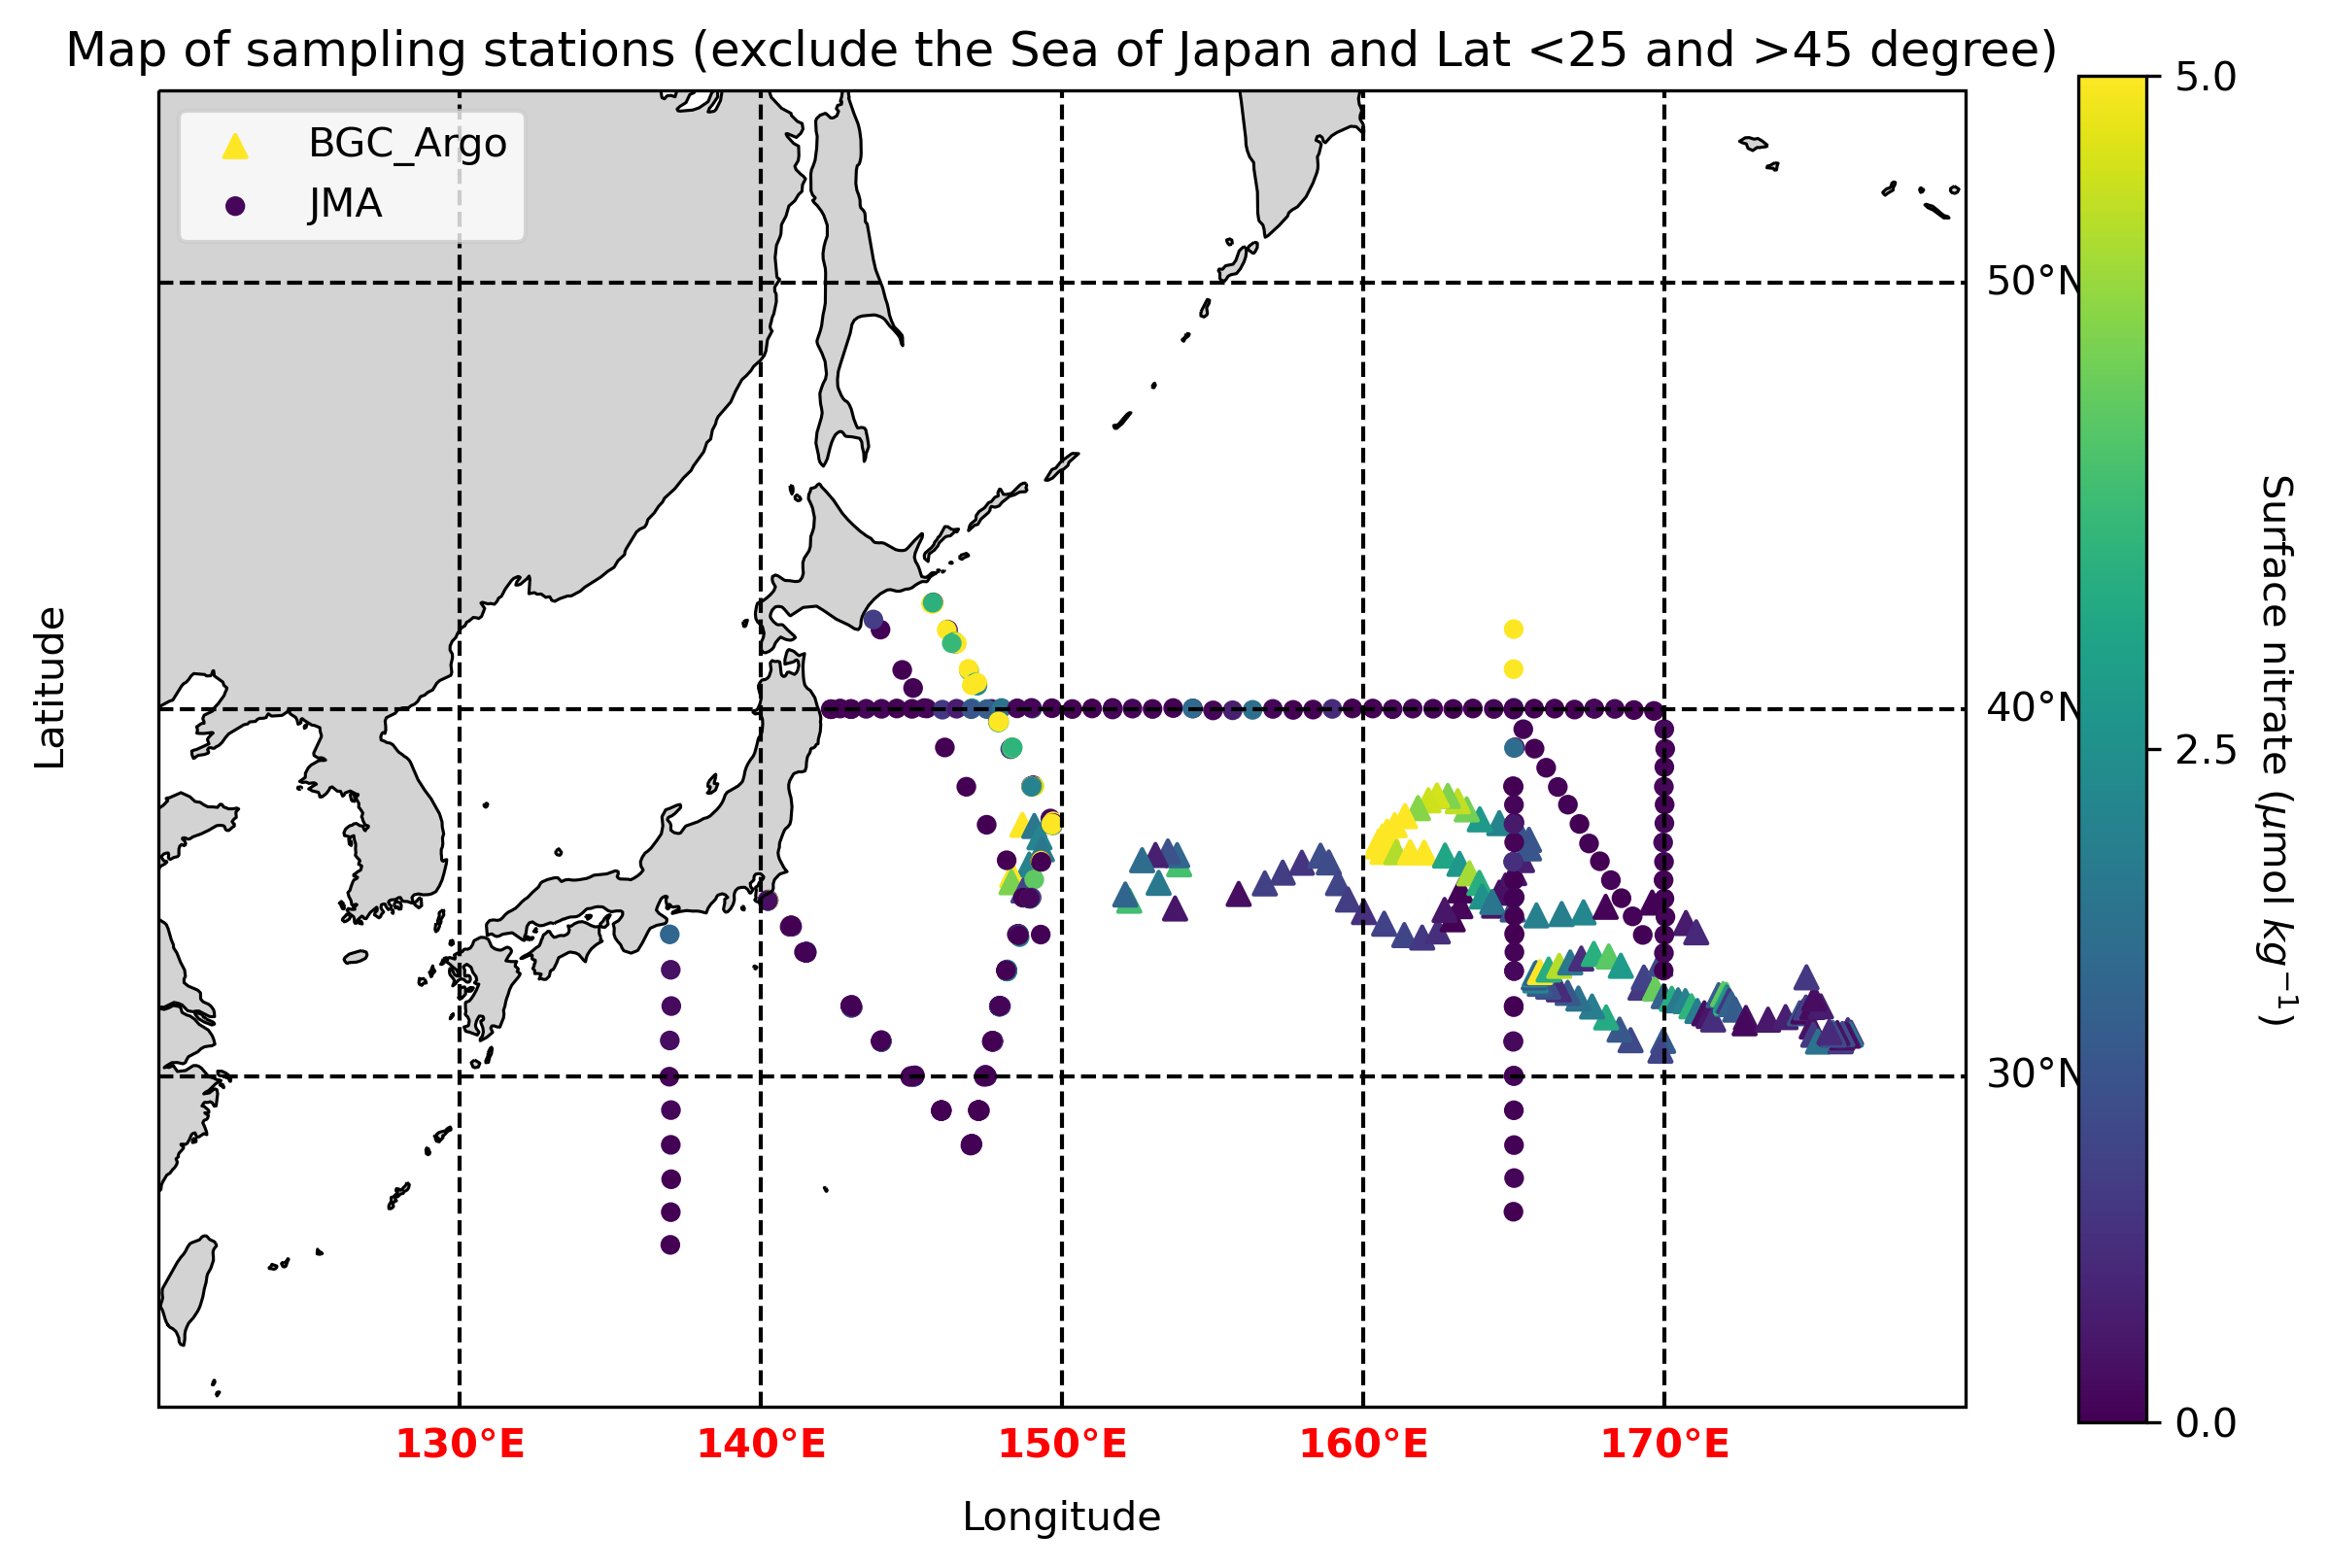

In [13]:
# create a regional map with parallels and meridians

fig = plt.figure(figsize = (10,8), dpi = 300)


ax = fig.add_subplot(1,1,1, projection = ccrs.Mercator
                     (central_longitude = 0.0, min_latitude = 20.0,
                      max_latitude = 55.0))

# ax.set_extent(east, west, south, north)
ax.set_extent([120.0, 180.0, 20.0, 50.0])

ax.coastlines(linewidth=0.75, color='black')

ax.set_title('Map of sampling stations (exclude the Sea of Japan and Lat <25 and >45 degree)')#, color = 'red', weight = 'bold')
ax.set_xlabel('Longitude',labelpad=5)


# how to add lines of latitude and longitude
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k',linestyle='--')

gl.top_labels = False
gl.left_labels = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# gl.xlines = True
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])

gl.ylocator = mticker.FixedLocator([20, 30, 40, 50, 55])

gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

ax.add_feature(cp.feature.LAND, facecolor = 'lightgrey')

# if you want to add text axes labels
ax.text(-0.05, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)

ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)

nn = ax.scatter(subset_argo.lon, subset_argo.lat,s=30, c= subset_argo.nitrate, vmin=0, vmax=5,transform=ccrs.PlateCarree(), marker='^',label='BGC_Argo')
mm= ax.scatter(subset_NSJ_surf.lon, subset_NSJ_surf.lat,s=15, c= subset_NSJ_surf.nitrate, vmin=0, vmax=5,transform=ccrs.PlateCarree(), marker='o',label='JMA')

ax.legend(loc = 'upper left') 
cb= fig.colorbar(nn,shrink=0.75)
cb.set_ticks([0, 2.5, 5])

# colorbar.ax.set_aspect(1)
cb.set_label('Surface nitrate ($\mu$mol $kg^{-1}$)', rotation=270, labelpad=15)
plt.show()

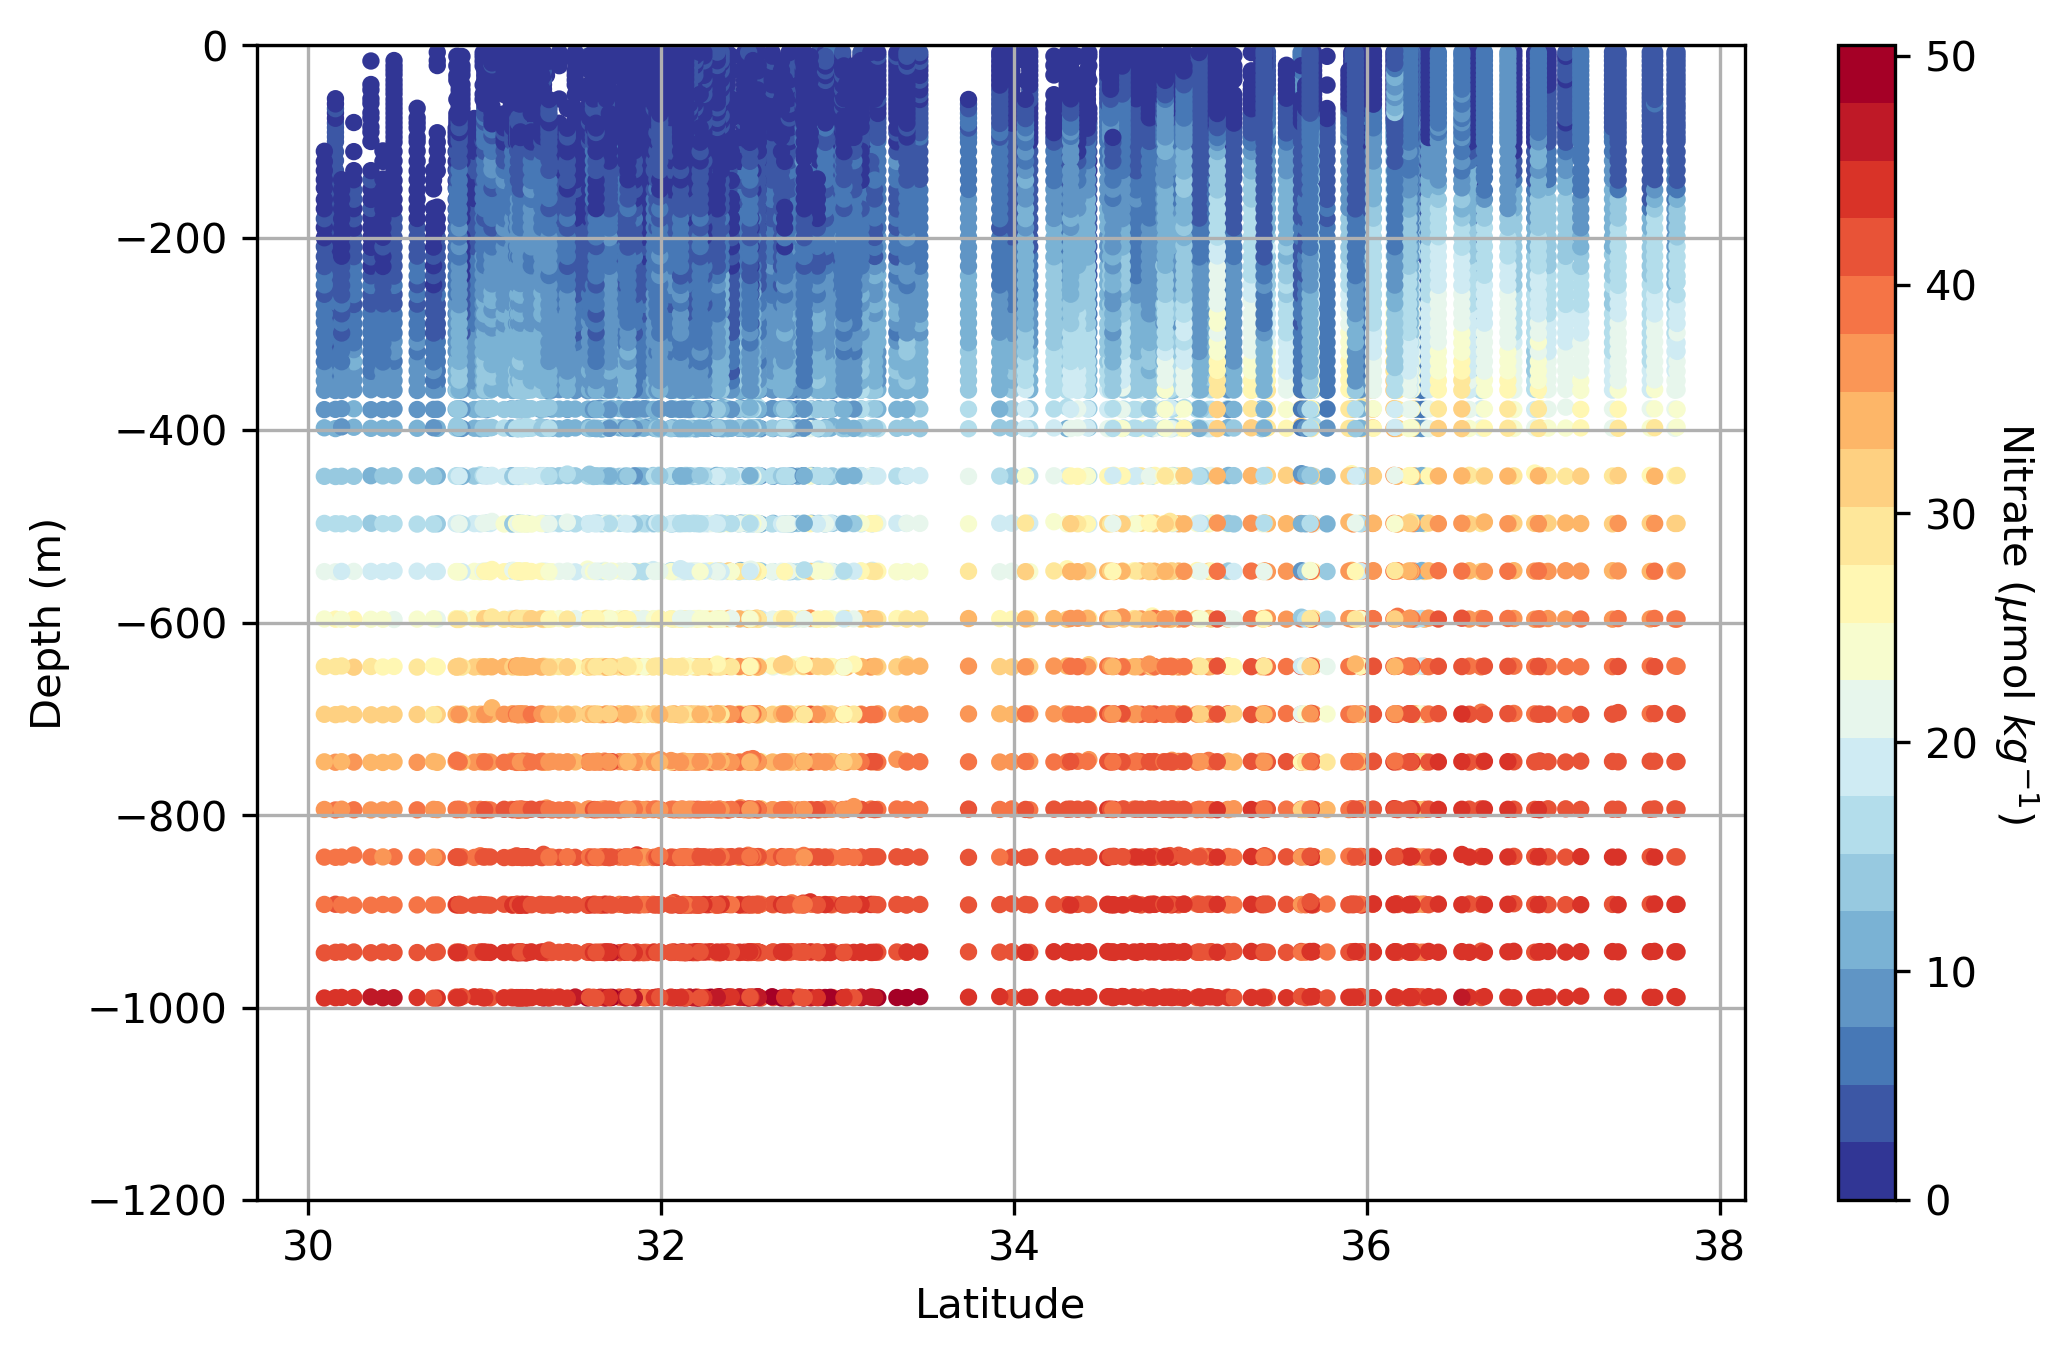

In [14]:
palette = plt.get_cmap('RdYlBu_r', 20 )
fig = plt.figure(figsize = (8,5), dpi = 300)
plt.scatter(data_argo.lat, data_argo.depth, s = 10, c = data_argo.nitrate, cmap = palette)
plt.ylim([-1200, 0])
# plt.gca().invert_yaxis()
plt.grid('True')
cb = plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
plt.xticks([30,32,34,36,38], ['30','32','34','36','38'])
cb.set_label('Nitrate ($\mu$mol $kg^{-1}$)', rotation=270, labelpad=15)
plt.show()


* ARGO data only collected water above 1000 m 
* so it is actually better to zoom the jma data into same depth range for model_regression as well


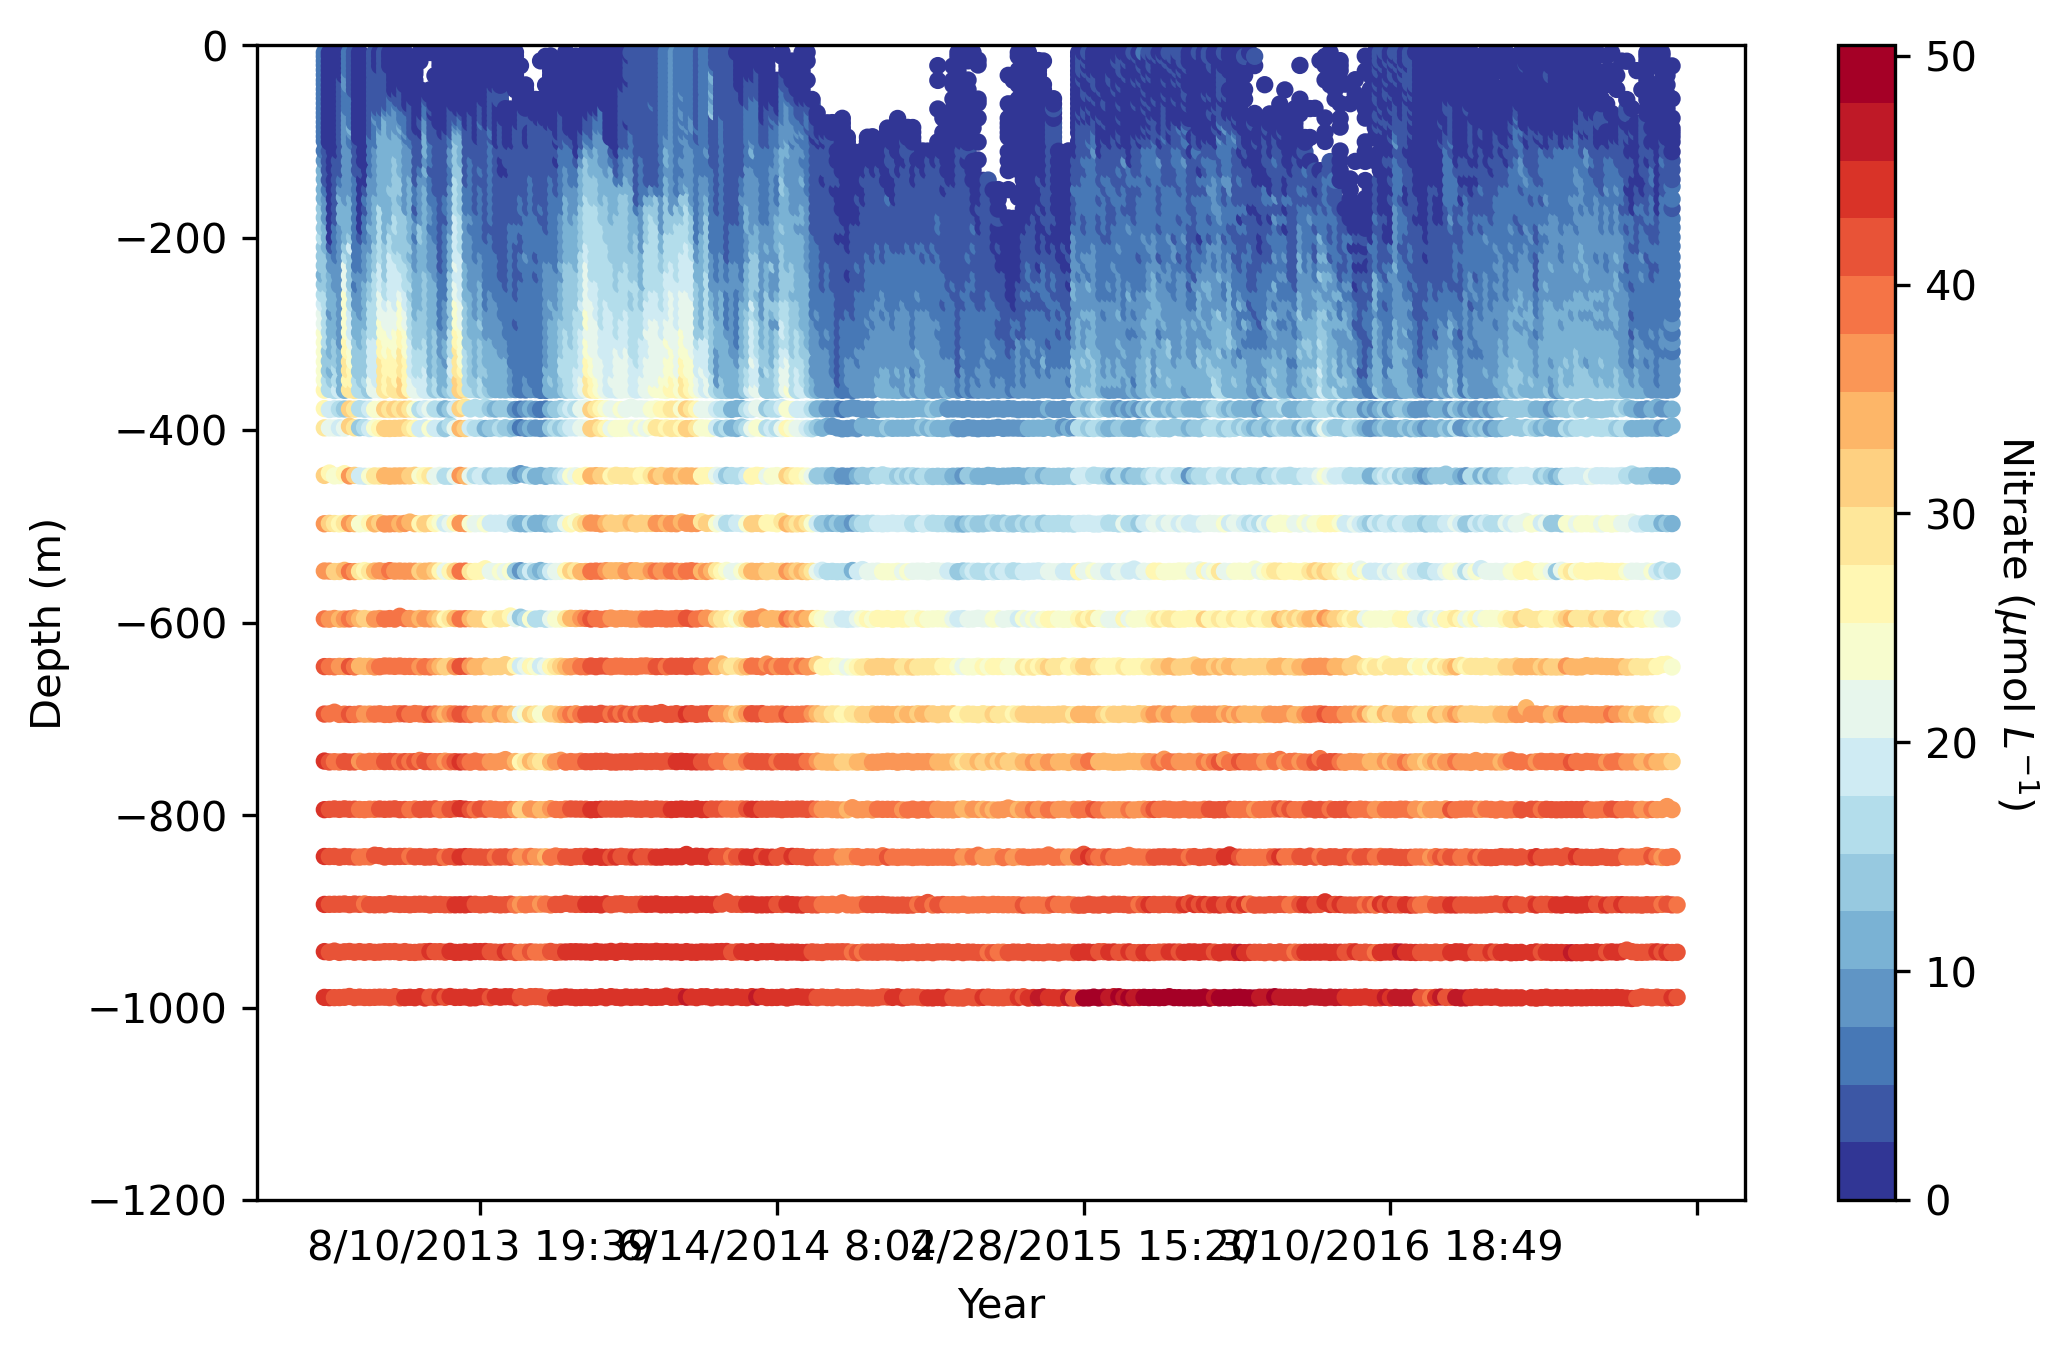

In [15]:
# combine year, month and day columns into a single datetime column

import matplotlib.dates as mdates
import datetime as dt

# data_argo['date'] = pd.to_datetime(data_argo[['year', 'month','day']])

palette = plt.get_cmap('RdYlBu_r', 20 )
fig = plt.figure(figsize = (8,5), dpi = 300)
plt.scatter(data_argo.date, data_argo.depth, s = 10, c = data_argo.nitrate, cmap = palette)
plt.ylim([-1200, 0])
# plt.gca().invert_yaxis()
# plt.grid('True')
cb = plt.colorbar()
plt.xlabel('Year')
plt.ylabel('Depth (m)')

xlim=plt.gca().get_xlim()
plt.xlim(xlim)

interval = mdates.MonthLocator(interval=2)
plt.gca().xaxis.set_major_locator(interval)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# plt.xticks([0, 5, 10, 15, 20,25,30,35,40,45,50], ['0', '5', '10', '15', '20','25','30','35','40','45','50'])
cb.set_label('Nitrate ($\mu$mol $L^{-1}$)', rotation=270, labelpad=15)
plt.show()

* The above plot shows that the date of BGC_Argo ranged from early 2013 to about the end of 2016 
* whereas the JMA dataset contains date from 2010 to the end of 2016.  

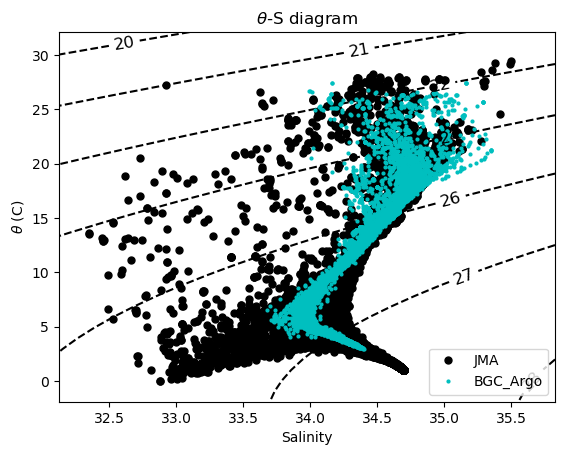

In [16]:
# this is seawter package installed in anaconda prompt using code "conda install -c conda-forge gsw"
import gsw
 
# Create variables 
temp  = subset_NSJ.theta
salt  = subset_NSJ.sal


# Figure out boudaries (mins and maxs)
smin = salt.min() - (0.01 * salt.min())
smax = salt.max() + (0.01 * salt.max())
tmin = temp.min() - (0.1 * temp.max())
tmax = temp.max() + (0.1 * temp.max())
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)+1,0))
 
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.rho(si[i],ti[j],0)
 
# Substract 1000 to convert to sigma-t
dens = dens - 1000 

# Plot data ***********************************************
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
CS = plt.contour(si,ti,dens, linestyles='dashed', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%1.0f') # Label every second level
 
# Define the variables for seawater properties
SP = data_argo.sal # Practical salinity (unitless)
t = data_argo.temp # In-situ temperature (degrees Celsius)
p = (data_argo.pres)*(-1) # Pressure (decibars)


# Calculate the potential temperature using the gsw.pt0 function
argo_theta = gsw.pt0_from_t(SP, t, p)

ax1.plot(subset_NSJ.sal,subset_NSJ.theta,'ok',markersize=5,label = 'JMA')
ax1.plot(data_argo.sal,argo_theta,'oc',markersize=2,label = 'BGC_Argo')
ax1.legend(loc = 'lower right') 
ax1.set_xlabel('Salinity')
ax1.set_ylabel(r'$\theta$ (C)')
plt.title(r'$\theta$-S diagram')
plt.show()  



* I converted temperature in Argo data to theta in order to make direct comparisons between the two dataset becasue JMA only provided theta
* Apparently, JMA_data set have more water masses. 
* The sliced JMA dataset may contain coastal waters off Japan, Kuroshio extension, Subtropical Pacific Oceanic water
* Since most of BGC_Argo datset ovelapped with JMA_dataset, so it is good to proceed with regression